In [2]:
library(mashr)
library(dplyr)
library(tidyr)

Loading required package: ashr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load inputs

In [7]:
#system('mkdir /nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/')
setwd('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/')

In [8]:
celltypes <- c('acinar','alpha','beta','delta','ductal','endothelial','gamma',
                'immune','stellate')
celltypes_all <- c('acinar','alpha','beta','delta','ductal','endothelial','gamma',
                'immune','stellate','bulk')

In [9]:
leads = read.table('../caQTLs_rasqual/Summary_allCells_leads_run1F.tsv', header=T)
dim(leads)
head(leads)

[1] 773267     34

Feature                 rsID               Chromosome position Ref Alt
1 chr6:32622377-32623439  chr6:32620608:T:A  chr6       32620608 T   A  
2 chr9:6931452-6932441    chr9:6929401:T:A   chr9        6929401 T   A  
3 chr4:7164816-7165698    chr4:7160692:T:C   chr4        7160692 T   C  
4 chr9:93230239-93231938  chr9:93231475:G:A  chr9       93231475 G   A  
5 chr17:76968760-76970675 chr17:76972946:C:A chr17      76972946 C   A  
6 chr21:13979625-13980808 chr21:13980560:G:C chr21      13980560 G   C  
  Af       HWEChi_square IA       Log10_qval ⋯ r2_rSNP  P_VAl        dist 
1 0.425926 2.231991      0.998678 -67.03611  ⋯ 0.824496 8.976233e-71 -2300
2 0.333333 0.750000      0.993936 -36.60879  ⋯ 0.985795 1.925609e-38 -2545
3 0.277778 0.006391      0.999935 -32.46831  ⋯ 0.902371 1.502522e-34 -4565
4 0.222222 0.137755      0.999392 -30.83427  ⋯ 0.992117 3.105136e-32   387
5 0.296296 0.337734      0.980182 -29.73370  ⋯ 0.940828 4.969777e-32  3228
6 0.314815 0.083599      0.930667 -27.70426  ⋯ 0.870565 7.793799e-30   344
  flag_fdr10 flag_fdr05 flag_fdr01 cell   exclude qtl 
1 TRUE       TRUE       TRUE       acinar FALSE   TRUE
2 TRUE       TRUE       TRUE       acinar FALSE   TRUE
3 TRUE       TRUE       TRUE       acinar FALSE   TRUE
4 TRUE       TRUE       TRUE       acinar FALSE   TRUE
5 TRUE       TRUE       TRUE       acinar FALSE   TRUE
6 TRUE       TRUE       TRUE       acinar FALSE   TRUE
  feature_snp                               
1 chr6:32622377-32623439_chr6:32620608:T:A  
2 chr9:6931452-6932441_chr9:6929401:T:A     
3 chr4:7164816-7165698_chr4:7160692:T:C     
4 chr9:93230239-93231938_chr9:93231475:G:A  
5 chr17:76968760-76970675_chr17:76972946:C:A
6 chr21:13979625-13980808_chr21:13980560:G:C

In [10]:
all = read.table('../caQTLs_rasqual/Summary_allCells_all_run1.tsv', header=T)
dim(all)
head(all)

[1] 45566023       35

Feature                rsID              Chromosome position Ref Alt Af      
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   0.425926
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   0.481481
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   0.481481
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   0.481481
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   0.462963
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   0.462963
  HWEChi_square IA       Log10_qval ⋯ P_VAl        dist  flag_fdr10 flag_fdr05
1 2.231991      0.998678 -67.03611  ⋯ 8.976233e-71 -2300 TRUE       TRUE      
2 3.033058      0.997176 -67.03611  ⋯ 3.415022e-70 -2616 TRUE       TRUE      
3 3.033058      0.997249 -67.03611  ⋯ 3.415022e-70 -2839 TRUE       TRUE      
4 3.033058      0.997319 -67.03611  ⋯ 3.459474e-70 -2654 TRUE       TRUE      
5 1.913385      0.999952 -66.25852  ⋯ 5.637594e-69   268 TRUE       TRUE      
6 1.913385      0.999952 -66.25852  ⋯ 5.650015e-69   214 TRUE       TRUE      
  flag_fdr01 cell   is_ct_peak exclude qtl 
1 TRUE       acinar TRUE       FALSE   TRUE
2 TRUE       acinar TRUE       FALSE   TRUE
3 TRUE       acinar TRUE       FALSE   TRUE
4 TRUE       acinar TRUE       FALSE   TRUE
5 TRUE       acinar TRUE       FALSE   TRUE
6 TRUE       acinar TRUE       FALSE   TRUE
  feature_snp                             
1 chr6:32622377-32623439_chr6:32620608:T:A
2 chr6:32622377-32623439_chr6:32620292:C:T
3 chr6:32622377-32623439_chr6:32620069:C:T
4 chr6:32622377-32623439_chr6:32620254:G:A
5 chr6:32622377-32623439_chr6:32623176:T:C
6 chr6:32622377-32623439_chr6:32623122:G:T

# Add z and format

In [11]:
#https://github.com/stephenslab/gtexresults/blob/master/workflows/fastqtl_to_mash.ipynb
all$z <- abs(qnorm(all$P_VAl / 2))
all$z[which(all$Effect_size < 0.5)] <- -1 * all$z[which(all$Effect_size < 0.5)]
head(all)
dim(all)

Feature                rsID              Chromosome position Ref Alt Af      
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   0.425926
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   0.481481
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   0.481481
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   0.481481
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   0.462963
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   0.462963
  HWEChi_square IA       Log10_qval ⋯ dist  flag_fdr10 flag_fdr05 flag_fdr01
1 2.231991      0.998678 -67.03611  ⋯ -2300 TRUE       TRUE       TRUE      
2 3.033058      0.997176 -67.03611  ⋯ -2616 TRUE       TRUE       TRUE      
3 3.033058      0.997249 -67.03611  ⋯ -2839 TRUE       TRUE       TRUE      
4 3.033058      0.997319 -67.03611  ⋯ -2654 TRUE       TRUE       TRUE      
5 1.913385      0.999952 -66.25852  ⋯   268 TRUE       TRUE       TRUE      
6 1.913385      0.999952 -66.25852  ⋯   214 TRUE       TRUE       TRUE      
  cell   is_ct_peak exclude qtl  feature_snp                             
1 acinar TRUE       FALSE   TRUE chr6:32622377-32623439_chr6:32620608:T:A
2 acinar TRUE       FALSE   TRUE chr6:32622377-32623439_chr6:32620292:C:T
3 acinar TRUE       FALSE   TRUE chr6:32622377-32623439_chr6:32620069:C:T
4 acinar TRUE       FALSE   TRUE chr6:32622377-32623439_chr6:32620254:G:A
5 acinar TRUE       FALSE   TRUE chr6:32622377-32623439_chr6:32623176:T:C
6 acinar TRUE       FALSE   TRUE chr6:32622377-32623439_chr6:32623122:G:T
  z       
1 17.78660
2 17.71156
3 17.71156
4 17.71083
5 17.55304
6 17.55292

[1] 45566023       36

In [12]:
all_wide <- pivot_wider(select(all, Feature, rsID, Chromosome, position, Ref, Alt, cell, z),
            names_from=cell, values_from=z)

dim(all_wide)
head(all_wide)

[1] 11650739       16

Feature                rsID              Chromosome position Ref Alt acinar  
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   17.78660
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   17.71156
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   17.71156
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   17.71083
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   17.55304
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   17.55292
  alpha    beta     delta ductal endothelial gamma immune stellate bulk    
1 13.49685 13.72701 NA    NA     NA          NA    NA     NA       21.28812
2 11.97842 12.12023 NA    NA     NA          NA    NA     NA       20.02031
3 11.97842 12.12023 NA    NA     NA          NA    NA     NA       20.02031
4 11.97581 12.11769 NA    NA     NA          NA    NA     NA       20.01875
5 12.41788 13.65049 NA    NA     NA          NA    NA     NA       20.61735
6 12.02216 13.30399 NA    NA     NA          NA    NA     NA       20.70906

In [13]:
nrow(all_wide)
length(unique(all_wide$rsID))

length(unique(paste0(all_wide$Feature, all_wide$rsID)))

[1] 11650739

[1] 4165827

[1] 11650739

In [14]:
all_wide_filt <- select(all_wide, -endothelial, -immune, -stellate)
all_wide_filt <- all_wide_filt[!(is.na(all_wide_filt$acinar)&
                               is.na(all_wide_filt$alpha)&
                               is.na(all_wide_filt$beta)&
                               is.na(all_wide_filt$delta)&
                               is.na(all_wide_filt$ductal)&
                               is.na(all_wide_filt$gamma)),]

dim(all_wide_filt)
head(all_wide_filt)

[1] 10667262       13

Feature                rsID              Chromosome position Ref Alt acinar  
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   17.78660
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   17.71156
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   17.71156
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   17.71083
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   17.55304
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   17.55292
  alpha    beta     delta ductal gamma bulk    
1 13.49685 13.72701 NA    NA     NA    21.28812
2 11.97842 12.12023 NA    NA     NA    20.02031
3 11.97842 12.12023 NA    NA     NA    20.02031
4 11.97581 12.11769 NA    NA     NA    20.01875
5 12.41788 13.65049 NA    NA     NA    20.61735
6 12.02216 13.30399 NA    NA     NA    20.70906

In [15]:
all_wide_filt_no_bulk <- select(all_wide_filt, -bulk)

dim(all_wide_filt_no_bulk)
head(all_wide_filt_no_bulk)

[1] 10667262       12

Feature                rsID              Chromosome position Ref Alt acinar  
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   17.78660
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   17.71156
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   17.71156
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   17.71083
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   17.55304
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   17.55292
  alpha    beta     delta ductal gamma
1 13.49685 13.72701 NA    NA     NA   
2 11.97842 12.12023 NA    NA     NA   
3 11.97842 12.12023 NA    NA     NA   
4 11.97581 12.11769 NA    NA     NA   
5 12.41788 13.65049 NA    NA     NA   
6 12.02216 13.30399 NA    NA     NA

In [16]:
#11524587 Run1F rows pre filter
#7807174 Run1F rows post filter

#11650739 Run1 rows pre filter
#10667262 Run1 rows post filter

In [17]:
gc()

used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   28892571  1543.1  121371892  6482.0  125522613  6703.7
Vcells 2636488839 20114.9 4806033761 36667.2 4805680552 36664.5

# Filter

In [119]:
all_wide_sig <- pivot_wider(select(all, Feature, rsID, Chromosome, position, Ref, Alt, cell, qtl),
            names_from=cell, values_from=qtl)

dim(all_wide_sig)
head(all_wide_sig)

[1] 11650739       16

Feature                rsID              Chromosome position Ref Alt acinar
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   TRUE  
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   TRUE  
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   TRUE  
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   TRUE  
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   TRUE  
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   TRUE  
  alpha beta delta ductal endothelial gamma immune stellate bulk
1 TRUE  TRUE NA    NA     NA          NA    NA     NA       TRUE
2 TRUE  TRUE NA    NA     NA          NA    NA     NA       TRUE
3 TRUE  TRUE NA    NA     NA          NA    NA     NA       TRUE
4 TRUE  TRUE NA    NA     NA          NA    NA     NA       TRUE
5 TRUE  TRUE NA    NA     NA          NA    NA     NA       TRUE
6 TRUE  TRUE NA    NA     NA          NA    NA     NA       TRUE

In [120]:
all_wide_sig_filt <- select(all_wide_sig, -endothelial, -immune, -stellate)
all_wide_sig_filt <- all_wide_sig_filt[!(is.na(all_wide_sig_filt$acinar)&
                               is.na(all_wide_sig_filt$alpha)&
                               is.na(all_wide_sig_filt$beta)&
                               is.na(all_wide_sig_filt$delta)&
                               is.na(all_wide_sig_filt$ductal)&
                               is.na(all_wide_sig_filt$gamma)),]

dim(all_wide_sig_filt)
head(all_wide_sig_filt)

[1] 10667262       13

Feature                rsID              Chromosome position Ref Alt acinar
1 chr6:32622377-32623439 chr6:32620608:T:A chr6       32620608 T   A   TRUE  
2 chr6:32622377-32623439 chr6:32620292:C:T chr6       32620292 C   T   TRUE  
3 chr6:32622377-32623439 chr6:32620069:C:T chr6       32620069 C   T   TRUE  
4 chr6:32622377-32623439 chr6:32620254:G:A chr6       32620254 G   A   TRUE  
5 chr6:32622377-32623439 chr6:32623176:T:C chr6       32623176 T   C   TRUE  
6 chr6:32622377-32623439 chr6:32623122:G:T chr6       32623122 G   T   TRUE  
  alpha beta delta ductal gamma bulk
1 TRUE  TRUE NA    NA     NA    TRUE
2 TRUE  TRUE NA    NA     NA    TRUE
3 TRUE  TRUE NA    NA     NA    TRUE
4 TRUE  TRUE NA    NA     NA    TRUE
5 TRUE  TRUE NA    NA     NA    TRUE
6 TRUE  TRUE NA    NA     NA    TRUE

In [121]:
all_wide_sig_filt_22 <- filter(all_wide_sig_filt, stringr::str_detect(rsID, 'chr22'))

dim(all_wide_sig_filt_22)
head(all_wide_sig_filt_22)
tail(all_wide_sig_filt_22)

[1] 229430     13

Feature                 rsID               Chromosome position Ref Alt acinar
1 chr22:43103619-43104734 chr22:43102820:T:A chr22      43102820 T   A   TRUE  
2 chr22:43103619-43104734 chr22:43104206:G:T chr22      43104206 G   T   TRUE  
3 chr22:46737581-46739608 chr22:46739375:G:A chr22      46739375 G   A   TRUE  
4 chr22:46737581-46739608 chr22:46739308:A:C chr22      46739308 A   C   TRUE  
5 chr22:43103619-43104734 chr22:43104429:A:G chr22      43104429 A   G   TRUE  
6 chr22:36238641-36240200 chr22:36239710:G:A chr22      36239710 G   A   TRUE  
  alpha beta delta ductal gamma bulk
1 FALSE TRUE FALSE FALSE  FALSE TRUE
2 FALSE TRUE FALSE FALSE  FALSE TRUE
3  TRUE TRUE  TRUE FALSE  FALSE TRUE
4  TRUE TRUE  TRUE FALSE  FALSE TRUE
5 FALSE TRUE FALSE FALSE  FALSE TRUE
6  TRUE TRUE FALSE FALSE  FALSE TRUE

Feature                 rsID               Chromosome position Ref Alt acinar
1 chr22:23539259-23539985 chr22:23539107:G:A chr22      23539107 G   A   NA    
2 chr22:25281632-25283624 chr22:25287850:G:A chr22      25287850 G   A   NA    
3 chr22:23535927-23536554 chr22:23529904:T:A chr22      23529904 T   A   NA    
4 chr22:25294081-25295425 chr22:25287850:G:A chr22      25287850 G   A   NA    
5 chr22:23520908-23523157 chr22:23529904:T:A chr22      23529904 T   A   NA    
6 chr22:23539259-23539985 chr22:23529904:T:A chr22      23529904 T   A   NA    
  alpha beta delta ductal gamma bulk
1 NA    NA   NA    NA     FALSE NA  
2 NA    NA   NA    NA     FALSE NA  
3 NA    NA   NA    NA     FALSE NA  
4 NA    NA   NA    NA     FALSE NA  
5 NA    NA   NA    NA     FALSE NA  
6 NA    NA   NA    NA     FALSE NA

In [122]:
all_wide_sig_filt_22_all_lead <- filter(all_wide_sig_filt_22, (paste0(Feature,rsID) %in% paste0(chr22_all_lead$Feature, chr22_all_lead$rsID)))

dim(all_wide_sig_filt_22_all_lead)
head(all_wide_sig_filt_22_all_lead)  

[1] 4727   13

Feature                 rsID               Chromosome position Ref Alt acinar
1 chr22:43103619-43104734 chr22:43102820:T:A chr22      43102820 T   A   TRUE  
2 chr22:46737581-46739608 chr22:46739308:A:C chr22      46739308 A   C   TRUE  
3 chr22:36238641-36240200 chr22:36239710:G:A chr22      36239710 G   A   TRUE  
4 chr22:42916095-42917170 chr22:42919387:T:C chr22      42919387 T   C   TRUE  
5 chr22:47065520-47066615 chr22:47064658:G:A chr22      47064658 G   A   TRUE  
6 chr22:43236465-43238893 chr22:43227753:G:C chr22      43227753 G   C   TRUE  
  alpha beta  delta ductal gamma bulk 
1 FALSE  TRUE FALSE FALSE  FALSE  TRUE
2  TRUE  TRUE  TRUE FALSE  FALSE  TRUE
3  TRUE  TRUE FALSE FALSE  FALSE  TRUE
4 FALSE FALSE    NA    NA     NA  TRUE
5 FALSE FALSE    NA    NA     NA FALSE
6 FALSE FALSE FALSE FALSE  FALSE  TRUE

In [128]:
lfsr <- data.frame(get_lfsr(m)<.05)
lfsr$Feature <- rownames(lfsr)

dim(lfsr)
head(lfsr)

[1] 4727    7

acinar alpha beta  delta ductal gamma
chr22:43103619-43104734 TRUE    TRUE  TRUE  TRUE  TRUE   TRUE
chr22:46737581-46739608 TRUE    TRUE  TRUE  TRUE  TRUE   TRUE
chr22:36238641-36240200 TRUE    TRUE  TRUE  TRUE  TRUE   TRUE
chr22:42916095-42917170 TRUE   FALSE FALSE FALSE FALSE  FALSE
chr22:47065520-47066615 TRUE   FALSE FALSE FALSE FALSE  FALSE
chr22:43236465-43238893 TRUE   FALSE FALSE FALSE FALSE  FALSE
                        Feature                
chr22:43103619-43104734 chr22:43103619-43104734
chr22:46737581-46739608 chr22:46737581-46739608
chr22:36238641-36240200 chr22:36238641-36240200
chr22:42916095-42917170 chr22:42916095-42917170
chr22:47065520-47066615 chr22:47065520-47066615
chr22:43236465-43238893 chr22:43236465-43238893

In [131]:
full_join(all_wide_sig_filt_22_all_lead, lfsr, by=join_by(Feature), suffix=c('.rasqual','.mash'))

Feature                 rsID               Chromosome position Ref Alt
1    chr22:43103619-43104734 chr22:43102820:T:A chr22      43102820 T   A  
2    chr22:46737581-46739608 chr22:46739308:A:C chr22      46739308 A   C  
3    chr22:36238641-36240200 chr22:36239710:G:A chr22      36239710 G   A  
4    chr22:42916095-42917170 chr22:42919387:T:C chr22      42919387 T   C  
5    chr22:47065520-47066615 chr22:47064658:G:A chr22      47064658 G   A  
6    chr22:43236465-43238893 chr22:43227753:G:C chr22      43227753 G   C  
7    chr22:27438245-27439224 chr22:27438374:A:G chr22      27438374 A   G  
8    chr22:43890585-43892472 chr22:43892426:G:C chr22      43892426 G   C  
9    chr22:29231827-29233021 chr22:29236742:T:C chr22      29236742 T   C  
10   chr22:26471258-26472206 chr22:26471689:C:T chr22      26471689 C   T  
11   chr22:26756463-26757283 chr22:26757001:G:T chr22      26757001 G   T  
12   chr22:29081595-29082407 chr22:29079595:C:T chr22      29079595 C   T  
13   chr22:49051574-49052730 chr22:49052447:G:A chr22      49052447 G   A  
14   chr22:46588402-46589028 chr22:46595735:G:A chr22      46595735 G   A  
15   chr22:33894164-33895057 chr22:33894728:A:G chr22      33894728 A   G  
16   chr22:37025485-37025857 chr22:37025661:A:G chr22      37025661 A   G  
17   chr22:30043973-30044958 chr22:30044544:G:A chr22      30044544 G   A  
18   chr22:44023662-44024974 chr22:44027065:C:T chr22      44027065 C   T  
19   chr22:45436968-45437293 chr22:45438799:G:A chr22      45438799 G   A  
20   chr22:48719209-48719466 chr22:48725765:A:G chr22      48725765 A   G  
21   chr22:24603026-24604580 chr22:24593953:C:T chr22      24593953 C   T  
22   chr22:26436668-26437541 chr22:26443691:T:A chr22      26443691 T   A  
23   chr22:50074197-50075464 chr22:50071829:T:C chr22      50071829 T   C  
24   chr22:25110348-25112265 chr22:25113063:G:A chr22      25113063 G   A  
25   chr22:20777346-20778942 chr22:20781058:T:G chr22      20781058 T   G  
26   chr22:33002014-33002439 chr22:33002915:C:A chr22      33002915 C   A  
27   chr22:44719511-44720068 chr22:44720920:A:G chr22      44720920 A   G  
28   chr22:30596898-30597940 chr22:30605119:A:C chr22      30605119 A   C  
29   chr22:27373132-27373734 chr22:27367816:A:G chr22      27367816 A   G  
30   chr22:42539152-42539903 chr22:42530182:G:T chr22      42530182 G   T  
⋮    ⋮                       ⋮                  ⋮          ⋮        ⋮   ⋮  
4698 chr22:32310153-32310353 chr22:32311184:C:G chr22      32311184 C   G  
4699 chr22:44558725-44559055 chr22:44562727:A:G chr22      44562727 A   G  
4700 chr22:24104936-24105284 chr22:24108024:C:T chr22      24108024 C   T  
4701 chr22:27299211-27299605 chr22:27295065:A:G chr22      27295065 A   G  
4702 chr22:20800842-20801042 chr22:20805560:C:T chr22      20805560 C   T  
4703 chr22:33334364-33335130 chr22:33344494:A:T chr22      33344494 A   T  
4704 chr22:50687310-50687518 chr22:50691970:T:C chr22      50691970 T   C  
4705 chr22:47570676-47570920 chr22:47562576:C:A chr22      47562576 C   A  
4706 chr22:36606218-36606462 chr22:36607409:T:C chr22      36607409 T   C  
4707 chr22:34053508-34053725 chr22:34051280:A:C chr22      34051280 A   C  
4708 chr22:37290755-37290985 chr22:37284471:G:A chr22      37284471 G   A  
4709 chr22:38631840-38632145 chr22:38624802:C:T chr22      38624802 C   T  
4710 chr22:32587216-32587870 chr22:32594549:G:A chr22      32594549 G   A  
4711 chr22:35484721-35484963 chr22:35483265:A:C chr22      35483265 A   C  
4712 chr22:43540524-43540834 chr22:43542010:G:C chr22      43542010 G   C  
4713 chr22:28670235-28670606 chr22:28679331:G:C chr22      28679331 G   C  
4714 chr22:26805153-26805555 chr22:26807633:T:C chr22      26807633 T   C  
4715 chr22:19508372-19508572 chr22:19504677:T:A chr22      19504677 T   A  
4716 chr22:23951464-23951707 chr22:23942093:C:G chr22      23942093 C   G  
4717 chr22:32868956-32869249 chr22:32878179:G:C chr22      32878179 G   C  
4718 chr22:29806344-29806712 chr22:29809583:C:T chr22

In [ ]:
names(beta_specific[4])
all_wide_filt_22_all_lead[all_wide_filt_22_all_lead$Feature ==names(beta_specific[4]),]$rsID

### Bulk

In [13]:
leads_sort <- arrange(leads, P_VAl)
top_leads <- filter(leads_sort[!duplicated(leads_sort$Feature),], qtl)

dim(top_leads)
head(top_leads)

[1] 14376    34

Feature                 rsID               Chromosome position Ref Alt
1 chr6:32622377-32623439  chr6:32622251:G:A  chr6       32622251 G   A  
2 chr11:3421659-3423660   chr11:3422496:T:A  chr11       3422496 T   A  
3 chr6:32668115-32668714  chr6:32666564:A:G  chr6       32666564 A   G  
4 chr8:17607871-17609288  chr8:17602712:A:G  chr8       17602712 A   G  
5 chr6:32609462-32610515  chr6:32619811:A:G  chr6       32619811 A   G  
6 chr20:33105588-33106830 chr20:33105772:G:A chr20      33105772 G   A  
  Af       HWEChi_square IA       Log10_qval ⋯ r2_rSNP  P_VAl         dist 
1 0.333333 0.000000      0.999943 -104.99728 ⋯ 0.946658 3.022743e-107  -657
2 0.111111 0.421875      0.961691  -77.18683 ⋯ 0.944782  3.460434e-79  -164
3 0.388889 5.578512      0.999942  -70.98903 ⋯ 0.878602  4.817525e-73 -1850
4 0.203704 0.020395      0.999579  -69.84104 ⋯ 0.775165  9.876701e-73 -5868
5 0.444444 1.080000      0.998689  -67.74389 ⋯ 0.859815  2.202070e-71  9823
6 0.259259 0.034439      0.998685  -67.41973 ⋯ 0.922625  1.480921e-69  -437
  flag_fdr10 flag_fdr05 flag_fdr01 cell exclude qtl 
1 TRUE       TRUE       TRUE       bulk FALSE   TRUE
2 TRUE       TRUE       TRUE       beta FALSE   TRUE
3 TRUE       TRUE       TRUE       bulk FALSE   TRUE
4 TRUE       TRUE       TRUE       bulk FALSE   TRUE
5 TRUE       TRUE       TRUE       bulk FALSE   TRUE
6 TRUE       TRUE       TRUE       bulk FALSE   TRUE
  feature_snp                               
1 chr6:32622377-32623439_chr6:32622251:G:A  
2 chr11:3421659-3423660_chr11:3422496:T:A   
3 chr6:32668115-32668714_chr6:32666564:A:G  
4 chr8:17607871-17609288_chr8:17602712:A:G  
5 chr6:32609462-32610515_chr6:32619811:A:G  
6 chr20:33105588-33106830_chr20:33105772:G:A

In [14]:
all_wide_filt_all_lead <- filter(all_wide_filt, (paste0(Feature,rsID) %in% paste0(top_leads$Feature, top_leads$rsID)))

dim(all_wide_filt_all_lead)
head(all_wide_filt_all_lead)  

[1] 14310    13

Feature                 rsID               Chromosome position Ref Alt
1 chr6:32622377-32623439  chr6:32622251:G:A  chr6       32622251 G   A  
2 chr9:6931452-6932441    chr9:6929401:T:A   chr9        6929401 T   A  
3 chr4:7164816-7165698    chr4:7160692:T:C   chr4        7160692 T   C  
4 chr9:93230239-93231938  chr9:93231475:G:A  chr9       93231475 G   A  
5 chr17:76968760-76970675 chr17:76972946:C:A chr17      76972946 C   A  
6 chr21:13979625-13980808 chr21:13980560:G:C chr21      13980560 G   C  
  acinar    alpha       beta        delta       ductal     gamma      
1 -16.92590 -15.7657616 -12.7162950          NA         NA          NA
2 -12.96527  -9.9097593  -8.9323300 -5.03420114 -3.9899362 -3.05540813
3  12.25905   3.3398356   0.0375721  0.97013959 -0.1065171  0.75549547
4 -11.81923  -0.5605773   1.0017235  0.00319545 -0.1034367 -0.03962553
5 -11.77965  -6.4622117  -8.3765604 -4.01921773 -5.6347250 -3.39645986
6 -11.34566  -6.6087548  -7.1513461 -2.42175383 -3.3510052 -3.17329019
  bulk      
1 -21.997802
2 -13.004538
3   9.372449
4  -5.826071
5 -13.719413
6  -9.989781

In [15]:
all_test_lead_z <- as.matrix(all_wide_filt_all_lead[c('acinar','alpha','beta','delta','ductal','gamma')])
rownames(all_test_lead_z) <- paste0(all_wide_filt_all_lead$Feature, "::",all_wide_filt_all_lead$rsID)
all_test_lead_se <- matrix(nrow=nrow(all_test_lead_z), ncol=ncol(all_test_lead_z), c(1))

dim(all_test_lead_z)
head(all_test_lead_z)
dim(all_test_lead_se)
head(all_test_lead_se)

[1] 14310     6

acinar    alpha       beta       
chr6:32622377-32623439::chr6:32622251:G:A   -16.92590 -15.7657616 -12.7162950
chr9:6931452-6932441::chr9:6929401:T:A      -12.96527  -9.9097593  -8.9323300
chr4:7164816-7165698::chr4:7160692:T:C       12.25905   3.3398356   0.0375721
chr9:93230239-93231938::chr9:93231475:G:A   -11.81923  -0.5605773   1.0017235
chr17:76968760-76970675::chr17:76972946:C:A -11.77965  -6.4622117  -8.3765604
chr21:13979625-13980808::chr21:13980560:G:C -11.34566  -6.6087548  -7.1513461
                                            delta       ductal     gamma      
chr6:32622377-32623439::chr6:32622251:G:A            NA         NA          NA
chr9:6931452-6932441::chr9:6929401:T:A      -5.03420114 -3.9899362 -3.05540813
chr4:7164816-7165698::chr4:7160692:T:C       0.97013959 -0.1065171  0.75549547
chr9:93230239-93231938::chr9:93231475:G:A    0.00319545 -0.1034367 -0.03962553
chr17:76968760-76970675::chr17:76972946:C:A -4.01921773 -5.6347250 -3.39645986
chr21:13979625-13980808::chr21:13980560:G:C -2.42175383 -3.3510052 -3.17329019

[1] 14310     6

[,1] [,2] [,3] [,4] [,5] [,6]
[1,] 1    1    1    1    1    1   
[2,] 1    1    1    1    1    1   
[3,] 1    1    1    1    1    1   
[4,] 1    1    1    1    1    1   
[5,] 1    1    1    1    1    1   
[6,] 1    1    1    1    1    1

In [16]:
all_test_z <- as.matrix(all_wide_filt[c('acinar','alpha','beta','delta','ductal','gamma')])
rownames(all_test_z) <- paste0(all_wide_filt$Feature, "::",all_wide_filt$rsID)
all_test_se <- matrix(nrow=nrow(all_test_z), ncol=ncol(all_test_z), c(1))

dim(all_test_z)
head(all_test_z)
dim(all_test_se)
head(all_test_se)

[1] 10667262        6

acinar   alpha    beta     delta
chr6:32622377-32623439::chr6:32620608:T:A 17.78660 13.49685 13.72701 NA   
chr6:32622377-32623439::chr6:32620292:C:T 17.71156 11.97842 12.12023 NA   
chr6:32622377-32623439::chr6:32620069:C:T 17.71156 11.97842 12.12023 NA   
chr6:32622377-32623439::chr6:32620254:G:A 17.71083 11.97581 12.11769 NA   
chr6:32622377-32623439::chr6:32623176:T:C 17.55304 12.41788 13.65049 NA   
chr6:32622377-32623439::chr6:32623122:G:T 17.55292 12.02216 13.30399 NA   
                                          ductal gamma
chr6:32622377-32623439::chr6:32620608:T:A NA     NA   
chr6:32622377-32623439::chr6:32620292:C:T NA     NA   
chr6:32622377-32623439::chr6:32620069:C:T NA     NA   
chr6:32622377-32623439::chr6:32620254:G:A NA     NA   
chr6:32622377-32623439::chr6:32623176:T:C NA     NA   
chr6:32622377-32623439::chr6:32623122:G:T NA     NA

[1] 10667262        6

[,1] [,2] [,3] [,4] [,5] [,6]
[1,] 1    1    1    1    1    1   
[2,] 1    1    1    1    1    1   
[3,] 1    1    1    1    1    1   
[4,] 1    1    1    1    1    1   
[5,] 1    1    1    1    1    1   
[6,] 1    1    1    1    1    1

In [20]:
data   = mash_set_data(all_test_z, all_test_se)
m.1by1 = mash_1by1(data)
strong = get_significant_results(m.1by1,0.05)

In [21]:
saveRDS(data, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_data.rds')
saveRDS(m.1by1, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash.rds')
gc()

used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells   28638764  1529.5   93270090  4981.2  116587612  6226.5
Vcells 2444463340 18649.8 5651725131 43119.3 5651725131 43119.3

In [22]:
length(strong)
head(strong)


[1] 90092

chr6:32622377-32623439::chr6:32619556:C:T 
                                       13 
chr6:32622377-32623439::chr6:32622497:T:A 
                                       14 
chr6:32622377-32623439::chr6:32622085:G:A 
                                       15 
chr6:32622377-32623439::chr6:32621128:G:T 
                                       16 
chr6:32622377-32623439::chr6:32620888:C:G 
                                       17 
chr6:32622377-32623439::chr6:32620724:T:C 
                                       18

In [23]:
leads <- rownames(all_test_lead_z)
length(leads)
head(leads)

[1] 14310

[1] "chr6:32622377-32623439::chr6:32622251:G:A"  
[2] "chr9:6931452-6932441::chr9:6929401:T:A"     
[3] "chr4:7164816-7165698::chr4:7160692:T:C"     
[4] "chr9:93230239-93231938::chr9:93231475:G:A"  
[5] "chr17:76968760-76970675::chr17:76972946:C:A"
[6] "chr21:13979625-13980808::chr21:13980560:G:C"

In [24]:
leads_in <- which(rownames(data$Bhat) %in% leads)
names(leads_in) <- rownames(data$Bhat)[which(rownames(data$Bhat) %in% leads)]
head(leads_in)

chr6:32622377-32623439::chr6:32622251:G:A 
                                        108 
     chr9:6931452-6932441::chr9:6929401:T:A 
                                        428 
     chr4:7164816-7165698::chr4:7160692:T:C 
                                        566 
  chr9:93230239-93231938::chr9:93231475:G:A 
                                        624 
chr17:76968760-76970675::chr17:76972946:C:A 
                                        637 
chr21:13979625-13980808::chr21:13980560:G:C 
                                        656

In [25]:
U.pca = cov_pca(data,5,subset=strong)
print(names(U.pca))

[1] "PCA_1" "PCA_2" "PCA_3" "PCA_4" "PCA_5" "tPCA" 


In [26]:
U.ed = cov_ed(data, U.pca, subset=strong)

In [27]:
U.pca.lead = cov_pca(data, 5, subset=leads_in)
print(names(U.pca.lead))

[1] "PCA_1" "PCA_2" "PCA_3" "PCA_4" "PCA_5" "tPCA" 


In [28]:
print(names(U.pca.lead))

[1] "PCA_1" "PCA_2" "PCA_3" "PCA_4" "PCA_5" "tPCA" 


In [29]:
head(data)

$Bhat
                                                      acinar         alpha
chr6:32622377-32623439::chr6:32620608:T:A       1.778660e+01  1.349685e+01
chr6:32622377-32623439::chr6:32620292:C:T       1.771156e+01  1.197842e+01
chr6:32622377-32623439::chr6:32620069:C:T       1.771156e+01  1.197842e+01
chr6:32622377-32623439::chr6:32620254:G:A       1.771083e+01  1.197581e+01
chr6:32622377-32623439::chr6:32623176:T:C       1.755304e+01  1.241788e+01
chr6:32622377-32623439::chr6:32623122:G:T       1.755292e+01  1.202216e+01
chr6:32622377-32623439::chr6:32623361:G:A       1.755268e+01  1.271243e+01
chr6:32622377-32623439::chr6:32623364:G:A       1.755268e+01  1.271243e+01
chr6:32622377-32623439::chr6:32624000:G:T       1.755241e+01  1.303171e+01
chr6:32622377-32623439::chr6:32626284:A:G       1.755241e+01  1.303171e+01
chr6:32622377-32623439::chr6:32623139:A:G       1.755241e+01  1.229543e+01
chr6:32622377-32623439::chr6:32622858:A:T       1.749720e+01  1.120689e+01
chr6:32622377-32623439::chr6:32619556:C:T      -1.723025e+01 -1.472705e+01
chr6:32622377-32623439::chr6:32622497:T:A      -1.711454e+01 -1.499118e+01
chr6:32622377-32623439::chr6:32622085:G:A      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32621128:G:T      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620888:C:G      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620724:T:C      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620686:G:A      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620457:A:G      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620389:G:A      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620146:A:G      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620145:T:C      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32620041:T:C      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32619908:C:T      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32619868:A:G      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32619828:C:T      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32619807:T:C      -1.706640e+01 -1.504129e+01
chr6:32622377-32623439::chr6:32622206:G:A      -1.706634e+01 -1.504123e+01
chr6:32622377-32623439::chr6:32622813:T:G       1.706463e+01  1.050621e+01
chr6:32622377-32623439::chr6:32623093:T:C       1.706408e+01  1.162322e+01
chr6:32622377-32623439::chr6:32623102:C:A       1.706408e+01  1.162297e+01
chr6:32622377-32623439::chr6:32621505:G:A       1.706402e+01  1.252601e+01
chr6:32622377-32623439::chr6:32621223:G:T       1.706402e+01  1.252601e+01
chr6:32622377-32623439::chr6:32623003:T:C       1.706390e+01  1.198074e+01
chr6:32622377-32623439::chr6:32622997:T:C       1.706388e+01  1.198075e+01
chr6:32622377-32623439::chr6:32620930:G:A       1.706348e+01  1.253234e+01
chr6:32622377-32623439::chr6:32623396:C:T       1.706337e+01  1.212555e+01
chr6:32622377-32623439::chr6:32623458:A:G       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32623460:A:G       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32622343:C:A       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32622314:T:G       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32622029:A:G       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32623789:A:G       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32622006:C:T       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32623820:T:C       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32621994:A:G       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32621974:T:C       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32621891:C:A       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32621706:G:A       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32624144:G:T       1.706337e+01  1.252512e+01
chr6:32622377-32623439::chr6:32624194:T:G       1.706337e+01  1.252512e+01
chr6:32622377-32623

In [30]:
U.ed.lead = cov_ed(data, U.pca.lead, subset=leads_in)

In [31]:
m.ed = mash(data, U.ed)
print(get_loglik(m.ed),digits = 10)

 - Computing 10667262 x 115 likelihood matrix.
 - Likelihood calculations took 1594.23 seconds.
 - Fitting model with 115 mixture components.
 - Model fitting took 3076.47 seconds.
 - Computing posterior matrices.
 - Computation allocated took 262.94 seconds.
[1] -498055797.7


In [32]:
saveRDS(m.ed, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_mash.rds')
m.ed <- NULL
gc()

used       (Mb)    gc trigger (Mb)    max used    (Mb)   
Ncells   28651237  1530.2   93270090  4981.2   116587612  6226.5
Vcells 2423634828 18490.9 9375877336 71532.3 11685951829 89156.8

In [33]:
m.ed.lead = mash(data, U.ed.lead)
print(get_loglik(m.ed.lead),digits = 10)

 - Computing 10667262 x 115 likelihood matrix.
 - Likelihood calculations took 2493.42 seconds.
 - Fitting model with 115 mixture components.
 - Model fitting took 3010.90 seconds.
 - Computing posterior matrices.
 - Computation allocated took 302.92 seconds.
[1] -498063719


In [34]:
saveRDS(m.ed.lead, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_lead_pca_mash.rds')
m.ed.lead <- NULL
gc()

used       (Mb)    gc trigger (Mb)    max used    (Mb)   
Ncells   28651245  1530.2   93270090  4981.2   116587612  6226.5
Vcells 2423634841 18490.9 8295362579 63288.6 11685951829 89156.8

In [35]:
U.c = cov_canonical(data)  
print(names(U.c))

 [1] "identity"      "acinar"        "alpha"         "beta"         
 [5] "delta"         "ductal"        "gamma"         "equal_effects"
 [9] "simple_het_1"  "simple_het_2"  "simple_het_3" 


In [36]:
m.c = mash(data, U.c)
print(get_loglik(m.c),digits = 10)

 - Computing 10667262 x 210 likelihood matrix.
 - Likelihood calculations took 2574.80 seconds.
 - Fitting model with 210 mixture components.
 - Model fitting took 10984.86 seconds.
 - Computing posterior matrices.
 - Computation allocated took 251.17 seconds.
[1] -498235540.1


In [37]:
saveRDS(m.c, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_canonical_mash.rds')
m.c <- NULL
gc()

used       (Mb)    gc trigger  (Mb)    max used    (Mb)    
Ncells   28652039  1530.2    93270090  4981.2   116587612   6226.5
Vcells 2423637029 18490.9 10527737536 80320.3 16376501864 124942.8

In [38]:
m.ed.both  = mash(data, c(U.ed,U.ed.lead))
print(get_loglik(m.ed.both),digits = 10)

 - Computing 10667262 x 229 likelihood matrix.
 - Likelihood calculations took 3093.98 seconds.
 - Fitting model with 229 mixture components.
 - Model fitting took 12102.12 seconds.
 - Computing posterior matrices.
 - Computation allocated took 295.68 seconds.
[1] -498053550.8


In [39]:
saveRDS(m.ed.both, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_lead_ash_pca_mash.rds')
m.ed.both <- NULL
gc()

used       (Mb)    gc trigger  (Mb)    max used    (Mb)    
Ncells   28652052  1530.2    93270090  4981.2   116587612   6226.5
Vcells 2423637051 18490.9 11274898518 86020.7 17565902437 134017.2

In [40]:
m   = mash(data, c(U.c,U.ed))
print(get_loglik(m),digits = 10)

 - Computing 10667262 x 324 likelihood matrix.
 - Likelihood calculations took 3900.84 seconds.
 - Fitting model with 324 mixture components.
 - Model fitting took 34751.62 seconds.
 - Computing posterior matrices.
 - Computation allocated took 405.28 seconds.
[1] -498050103.9


In [ ]:
saveRDS(m, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash.rds')
#m <- NULL
gc()

In [ ]:
write.table(m$result$PosteriorMean, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_PosteriorMean.tsv', 
                                  row.names=T, col.names=T, sep='\t', quote=F)
write.table(m$result$PosteriorSD, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_PosteriorSD.tsv', 
                                  row.names=T, col.names=T, sep='\t', quote=F)
write.table(get_lfsr(m), '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_lfsr.tsv', 
                                  row.names=T, col.names=T, sep='\t', quote=F)

In [ ]:
m.lead   = mash(data, c(U.c,U.ed.lead))
print(get_loglik(m.lead),digits = 10)

In [47]:
m.lead <- readRDS('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_lead_pca_canocical_mash.rds')
print(get_loglik(m.lead),digits = 10)
m.lead <- NULL

[1] -498053447.2


In [ ]:
saveRDS(m.lead, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_lead_pca_canocical_mash.rds')
m.lead <- NULL
gc()

In [49]:
summary(m)

                  Length    Class  Mode   
result                    4 -none- list   
loglik                    1 -none- numeric
vloglik            10667262 -none- numeric
null_loglik        10667262 -none- numeric
alt_loglik         10667262 -none- numeric
fitted_g                  4 -none- list   
posterior_weights 170676192 -none- numeric
alpha                     1 -none- numeric

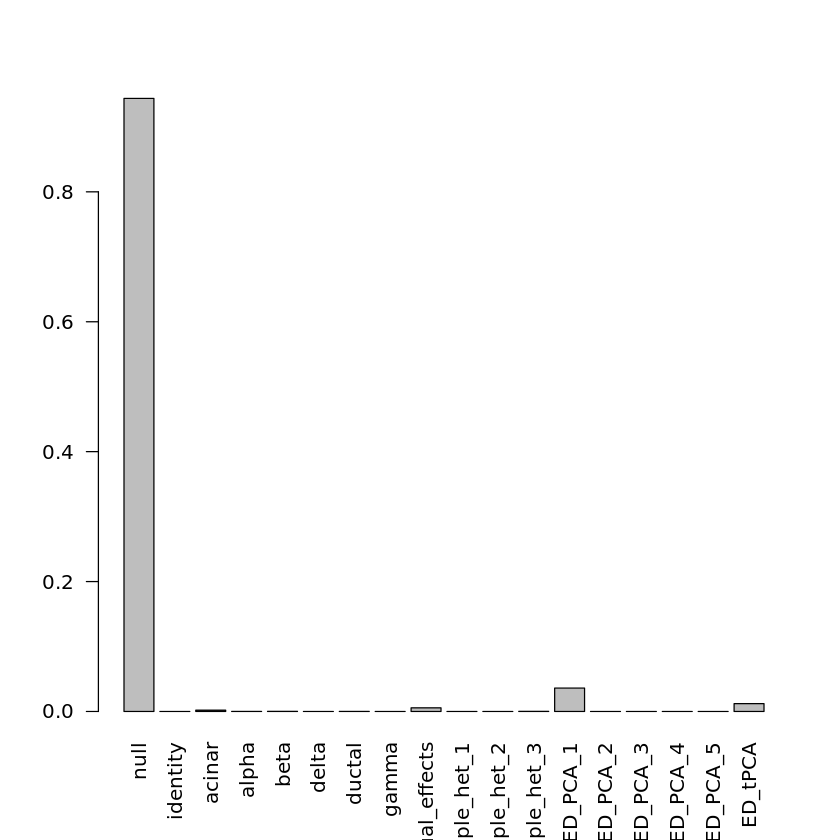

In [50]:
barplot(get_estimated_pi(m),las = 2)

In [51]:
print(get_pairwise_sharing(m, factor=0))

          acinar     alpha      beta     delta    ductal     gamma
acinar 1.0000000 0.9714127 0.9639493 0.9743097 0.9922443 0.9756338
alpha  0.9714127 1.0000000 0.9903015 0.9980612 0.9946454 0.9984641
beta   0.9639493 0.9903015 1.0000000 0.9981221 0.9912459 0.9975233
delta  0.9743097 0.9980612 0.9981221 1.0000000 0.9965149 0.9998851
ductal 0.9922443 0.9946454 0.9912459 0.9965149 1.0000000 0.9968821
gamma  0.9756338 0.9984641 0.9975233 0.9998851 0.9968821 1.0000000


[1] "chr6:32622377-32623439::chr6:32619556:C:T"

character(0)

acinar        alpha         beta        delta       ductal        gamma 
0.000000e+00 0.000000e+00 0.000000e+00 6.144770e-05 1.340683e-04 6.144779e-05

Feature rsID cell Log10_qval P_VAl flag_fdr05 z

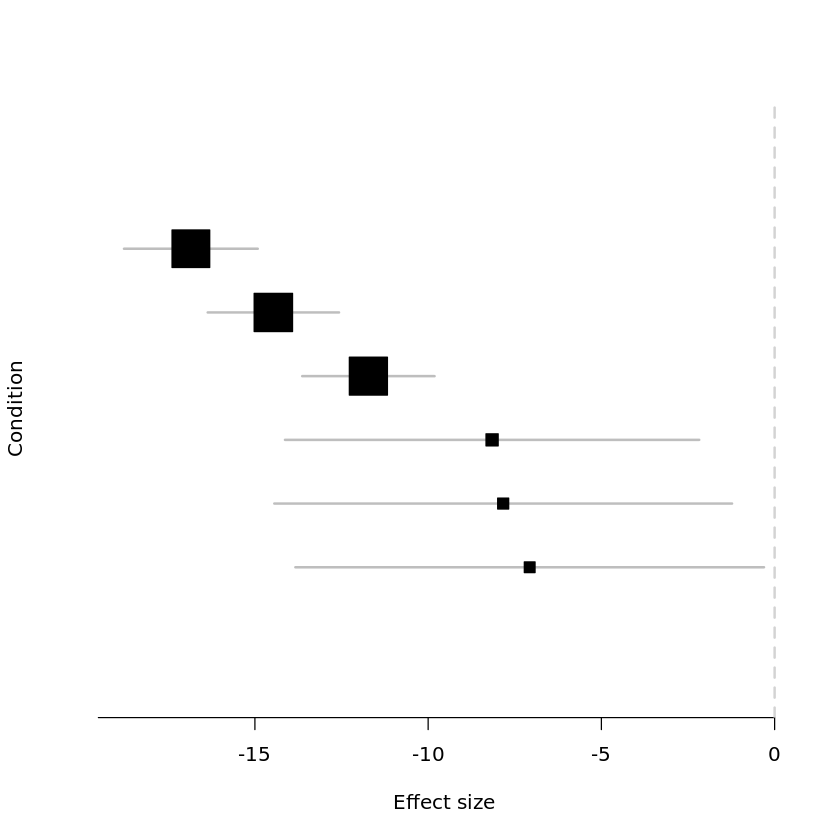

In [52]:
names(get_significant_results(m)[1])
all_wide_filt_all_lead[all_wide_filt_all_lead$Feature ==names(get_significant_results(m)[1]),]$rsID

mash_plot_meta(m,get_significant_results(m)[1])

get_lfsr(m)[names(get_significant_results(m)[1]),]

select(all[all$Feature == names(get_significant_results(m)[1]) & all$rsID == all_wide_filt_all_lead[all_wide_filt_all_lead$Feature ==names(get_significant_results(m)[1]),]$rsID,], Feature, rsID, cell, Log10_qval, P_VAl, flag_fdr05, z)

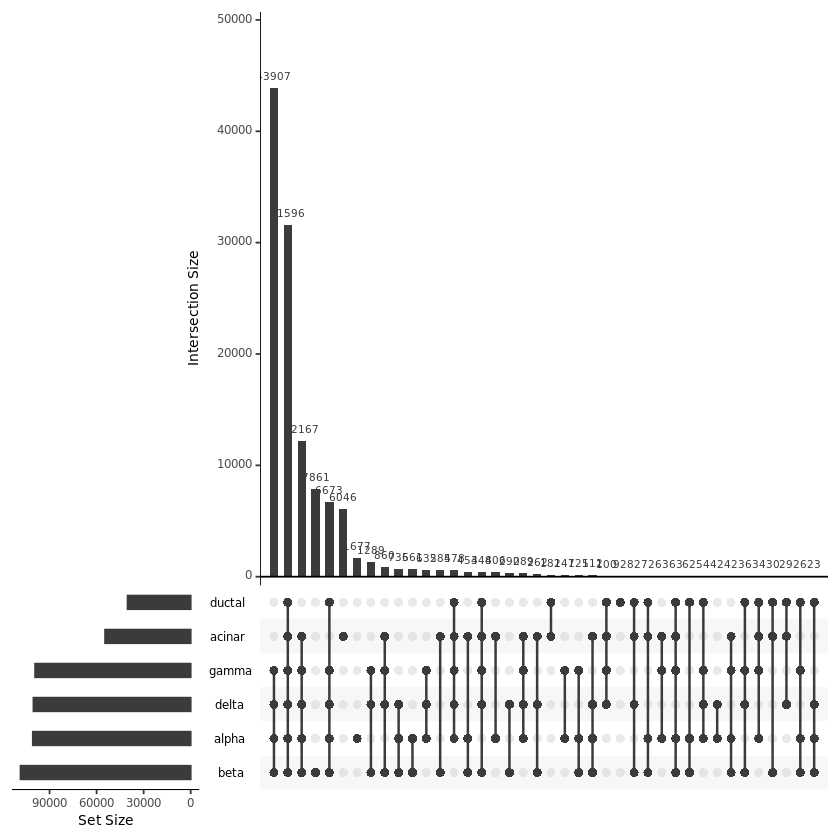

In [53]:
library(UpSetR)

upset_data <- data.frame(matrix(as.numeric(get_lfsr(m) < .01), ncol=6))
colnames(upset_data) <- colnames(get_lfsr(m))

upset(upset_data, nsets=6, order.by = "freq")

In [29]:
get_lfsr(m)

acinar       alpha       
chr6:32622377-32623439::chr6:32620608:T:A      7.580113e-71 3.890327e-44
chr6:32622377-32623439::chr6:32620292:C:T      6.229293e-70 2.141453e-35
chr6:32622377-32623439::chr6:32620069:C:T      6.229293e-70 2.141453e-35
chr6:32622377-32623439::chr6:32620254:G:A      6.317192e-70 2.212350e-35
chr6:32622377-32623439::chr6:32623176:T:C      6.605757e-69 5.066307e-38
chr6:32622377-32623439::chr6:32623122:G:T      8.077771e-69 7.662778e-36
chr6:32622377-32623439::chr6:32623361:G:A      6.359986e-69 1.601228e-39
chr6:32622377-32623439::chr6:32623364:G:A      6.357434e-69 1.598764e-39
chr6:32622377-32623439::chr6:32624000:G:T      5.169506e-69 1.847676e-41
chr6:32622377-32623439::chr6:32626284:A:G      5.169506e-69 1.847676e-41
chr6:32622377-32623439::chr6:32623139:A:G      6.947306e-69 2.261102e-37
chr6:32622377-32623439::chr6:32622858:A:T      3.025069e-68 1.249772e-31
chr6:32622377-32623439::chr6:32619556:C:T      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32622497:T:A      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32622085:G:A      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32621128:G:T      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620888:C:G      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620724:T:C      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620686:G:A      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620457:A:G      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620389:G:A      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620146:A:G      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620145:T:C      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32620041:T:C      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32619908:C:T      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32619868:A:G      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32619828:C:T      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32619807:T:C      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32622206:G:A      0.000000e+00 0.000000e+00
chr6:32622377-32623439::chr6:32622813:T:G      7.250840e-65 4.806222e-28
⋮                                              ⋮            ⋮           
chr2:66387259-66387705::chr2:66397362:G:A      0.9762137    0.9771074   
chr2:66387259-66387705::chr2:66394321:T:G      0.9762138    0.9771075   
chr2:66387259-66387705::chr2:66392108:C:T      0.9762139    0.9771075   
chr7:29225614-29226044::chr7:29228301:T:A      0.9762241    0.9771187   
chr14:21097496-21098896::chr14:21104100:G:C    0.9762463    0.9771430   
chr7:29225614-29226044::chr7:29235383:C:T      0.9762981    0.9771995   
chr7:29225614-29226044::chr7:29226434:A:G      0.9763043    0.9772063   
chr7:29225614-29226044::chr7:29221156:G:T      0.9763043    0.9772063   
chr7:29225614-29226044::chr7:29219603:A:G      0.9763043    0.9772063   
chr7:29225614-29226044::chr7:29229518:G:A      0.9763107    0.9772133   
chr7:29225614-29226044::chr7:29231342:C:T      0.9763107    0.9772133   
chr17:64441922-64443545::chr17:64447542:T:C    0.9763304    0.9772348   
chr2:66387259-66387705::chr2:66377347:T:C      0.9763309    0.9772353   
chr2:66387259-66387705::chr2:66391912:C:T      0.9765139    0.9774355   
chr2:66387259-66387705::chr2:66390711:C:A      0.9766439    0.9775778   
chr17:64441922-64443545::chr17:64446926:C:T    0.9766637    0.9775995   
chr19:615648-616598::chr19:610273:G:A          0.9766642    0.9776000   
chr7:29225614-29226044::chr7:29218471:A:G      0.9767171    0.9776580   
chr7:29225614-29226044::chr7:29218404:A:C      0.9767171    0.9776580   
chr14:105484138-105485037::chr14:105493982:A:G 0.9767181    0.9776591   
chr7:29225614-29226044::chr7:29234213:C:T      0.9767397    0.9776828   
chr7:29225614-29226044::chr7:29216952:G:A      0.9767397    0.9776828   
chr7:29225614-29226044::chr7:29215854:A:G      0.9767397    0.9776828   
chr7:29225614-29226044::chr7:292

In [ ]:
m <- readRDS('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash.rds')
m

#m <- NULL
gc()

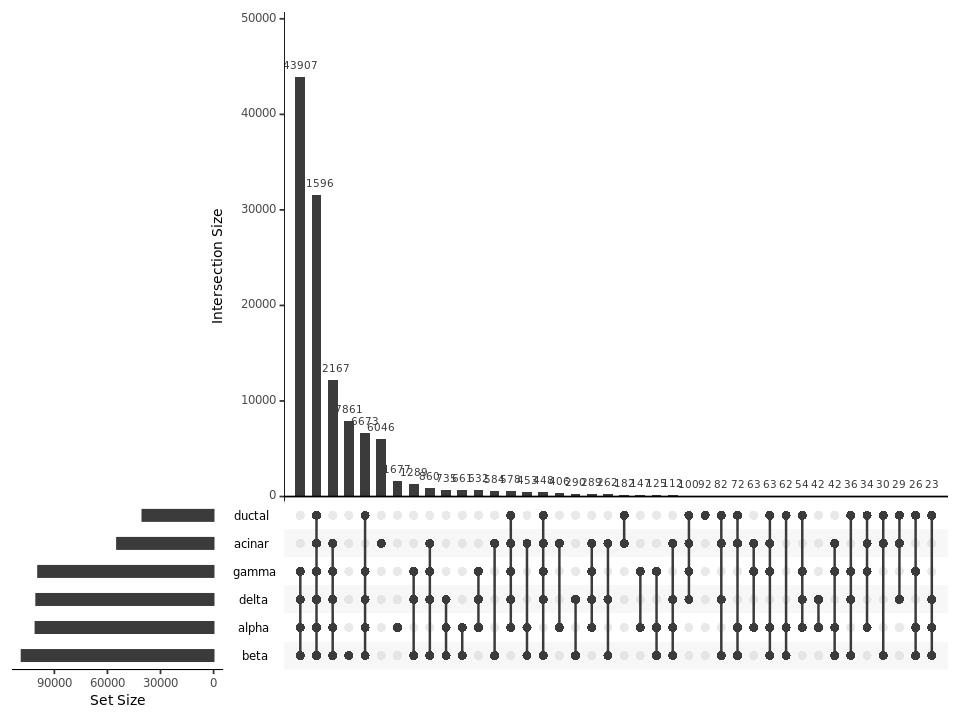

In [30]:
#library(UpSetR)

options(repr.plot.width=8, repr.plot.height=6)

upset_data <- data.frame(matrix(as.numeric(get_lfsr(m) < .01), ncol=6))
colnames(upset_data) <- colnames(get_lfsr(m))

upset(upset_data, nsets=6, order.by = "freq")

acinar alpha beta delta ductal gamma
chr10:100006062-100006793 0      0     0    0     0      0    
chr10:100009188-100010635 0      0     0    0     0      0    
chr10:100019905-100021214 0      0     0    0     0      0    
chr10:100025565-100025888 0      0     0    0     0      0    
chr10:100037925-100038813 0      0     0    0     0      0    
chr10:100043372-100044999 0      0     0    0     0      0

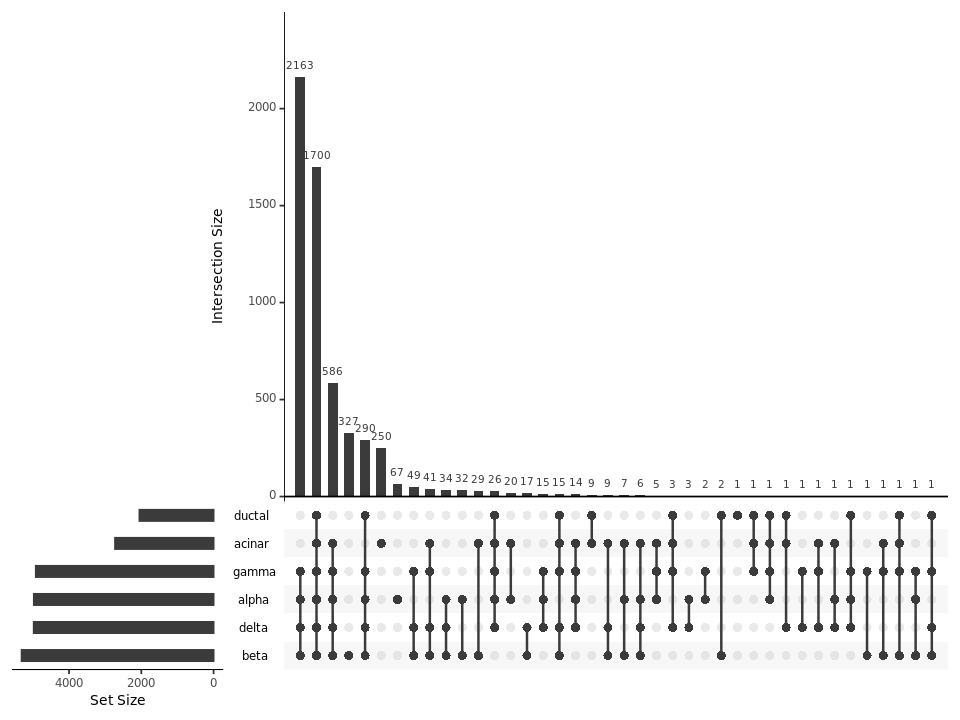

In [53]:
bool_lfsr <- data.frame(get_lfsr(m) < .01)
bool_lfsr$Peak <- stringr::str_split(rownames(bool_lfsr), "::", simplify=T)[,1]

upset_data <- group_by(bool_lfsr, Peak) %>%
    summarise_all(any) %>%
    tibble::column_to_rownames(var='Peak') %>%
    mutate_all(as.numeric)

head(upset_data)
upset(upset_data, nsets=6, order.by = "freq")

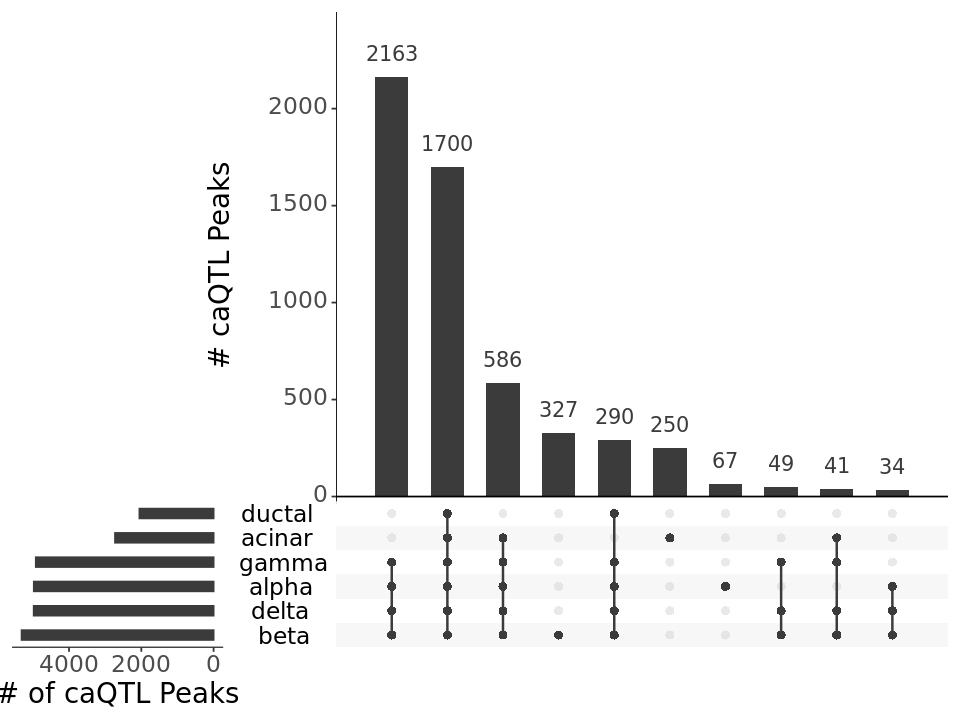

In [64]:
upset(upset_data, nsets=6, order.by = "freq", nintersects=10, mainbar.y.label="# caQTL Peaks", 
      sets.x.label="# of caQTL Peaks", text.scale=2)


png 
  2

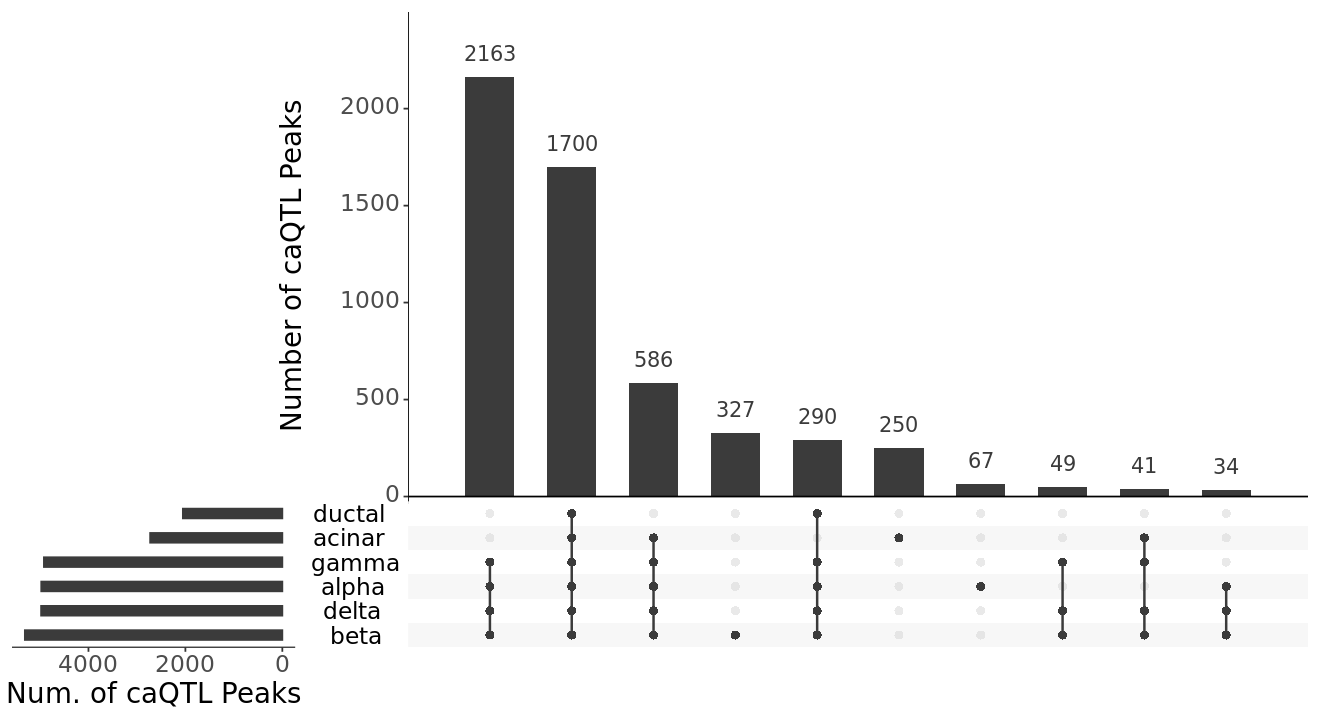

In [72]:
options(repr.plot.width=11, repr.plot.height=6)
p1 <- upset(upset_data, nsets=6, order.by = "freq", nintersects=10, mainbar.y.label="Number of caQTL Peaks", 
      sets.x.label="Num. of caQTL Peaks", text.scale=2)

p1

pdf("/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/figures/Run1F.mashr.Peak.upset.lfsr.01.pdf",
            width=11, height=6)
print(p1)
dev.off()

In [73]:
dev.list()

png 
  2

In [54]:
?upset

upset                  package:UpSetR                  R Documentation

_U_p_S_e_t_R _P_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     Visualization of set intersections using novel UpSet matrix
     design.

_U_s_a_g_e:

     upset(data, nsets = 5, nintersects = 40, sets = NULL,
       keep.order = F, set.metadata = NULL, intersections = NULL,
       matrix.color = "gray23", main.bar.color = "gray23",
       mainbar.y.label = "Intersection Size", mainbar.y.max = NULL,
       sets.bar.color = "gray23", sets.x.label = "Set Size",
       point.size = 2.2, line.size = 0.7, mb.ratio = c(0.7, 0.3),
       expression = NULL, att.pos = NULL, att.color = main.bar.color,
       order.by = c("freq", "degree"), decreasing = c(T, F),
       show.numbers = "yes", number.angles = 0, group.by = "degree",
       cutoff = NULL, queries = NULL, query.legend = "none",
       shade.color = "gray88", shade.alpha = 0.25, matrix.dot.alpha = 0.5,
       empty.intersections = NULL, color.pal = 1, boxplot.summary = NULL,
       attribute.plots = NULL, scale.intersections = "identity",
       scale.sets = "identity", text.scale = 1, set_size.angles = 0,
       set_size.show = FALSE, set_size.numbers_size = NULL,
       set_size.scale_max = NULL)
     
_A_r_g_u_m_e_n_t_s:

    data: Data set

   nsets: Number of sets to look at

nintersects: Number of intersections to plot. If set to NA, all
          intersections will be plotted.

    sets: Specific sets to look at (Include as combinations. Ex:
          c("Name1", "Name2"))

keep.order: Keep sets in the order entered using the sets parameter.
          The default is FALSE, which orders the sets by their sizes.

set.metadata: Metadata that offers insight to an attribute of the sets.
          Input should be a data frame where the first column is set
          names, and the remaining columns are attributes of those
          sets. To learn how to use this parameter it is highly
          suggested to view the set metadata vignette. The link can be
          found on the package's GitHub page.

intersections: Specific intersections to include in plot entered as a
          list of lists. Ex: list(list("Set name1", "Set name2"),
          list("Set name1", "Set name3")). If data is entered into this
          parameter the only data shown on the UpSet plot will be the
          specific intersections listed.

matrix.color: Color of the intersection points

main.bar.color: Color of the main bar plot

mainbar.y.label: The y-axis label of the intersection size bar plot

mainbar.y.max: The maximum y value of the intersection size bar plot
          scale. May be useful when aligning multiple UpSet plots
          horizontally.

sets.bar.color: Color of set size bar plot

sets.x.label: The x-axis label of the set size bar plot

point.size: Size of points in matrix plot

line.size: Width of lines in matrix plot

mb.ratio: Ratio between matrix plot and main bar plot (Keep in terms of
          hundredths)

expression: Expression to subset attributes of intersection or element
          query data. Enter as string (Ex: "ColName > 3")

 att.pos: Position of attribute plot. If NULL or "bottom" the plot will
          be at below UpSet plot. If "top" it will be above UpSet plot

att.color: Color of attribute histogram bins or scatterplot points for
          unqueried data represented by main bars. Default set to color
          of main bars.

order.by: How the intersections in the matrix should be ordered by.
          Options include frequency (entered as "freq"), degree, or
          both in any order.

decreasing: How the variables in order.by should be ordered. "freq" is
          decreasing (greatest to least) and "degree" is increasing
          (least to greatest)

show.numbers: Show numbers of intersection sizes above bars

number.angles: The angle of the numbers atop the intersection size bars

group.by: How the data should be grouped ("degree" or "sets")

  cutoff: The number o

In [44]:
stringr::str_split(rownames(head(bool_lfsr)), "::", simplify=T)[,1]

[1] "chr6:32622377-32623439" "chr6:32622377-32623439" "chr6:32622377-32623439"
[4] "chr6:32622377-32623439" "chr6:32622377-32623439" "chr6:32622377-32623439"

In [45]:
bool_lfsr$Peak <- stringr::str_split(rownames(bool_lfsr), "::", simplify=T)[,1]

head(bool_lfsr)

acinar alpha beta delta ductal gamma
chr6:32622377-32623439::chr6:32620608:T:A TRUE   TRUE  TRUE TRUE  TRUE   TRUE 
chr6:32622377-32623439::chr6:32620292:C:T TRUE   TRUE  TRUE TRUE  TRUE   TRUE 
chr6:32622377-32623439::chr6:32620069:C:T TRUE   TRUE  TRUE TRUE  TRUE   TRUE 
chr6:32622377-32623439::chr6:32620254:G:A TRUE   TRUE  TRUE TRUE  TRUE   TRUE 
chr6:32622377-32623439::chr6:32623176:T:C TRUE   TRUE  TRUE TRUE  TRUE   TRUE 
chr6:32622377-32623439::chr6:32623122:G:T TRUE   TRUE  TRUE TRUE  TRUE   TRUE 
                                          Peak                  
chr6:32622377-32623439::chr6:32620608:T:A chr6:32622377-32623439
chr6:32622377-32623439::chr6:32620292:C:T chr6:32622377-32623439
chr6:32622377-32623439::chr6:32620069:C:T chr6:32622377-32623439
chr6:32622377-32623439::chr6:32620254:G:A chr6:32622377-32623439
chr6:32622377-32623439::chr6:32623176:T:C chr6:32622377-32623439
chr6:32622377-32623439::chr6:32623122:G:T chr6:32622377-32623439

In [ ]:
group_by(bool_lfsr, Peak) %>%
    summarise_all(any) %>%
    select(-Peak)

In [ ]:
group_by(bool_lfsr, Peak) %>%
    summarise_all(any) %>%
    tibble::column_to_rownames(var='Peak') %>%
    mutate_all(as.numeric)

In [50]:
?mutate_all

mutate_all                package:dplyr                R Documentation

_M_u_t_a_t_e _m_u_l_t_i_p_l_e _c_o_l_u_m_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     *[Superseded]*

     Scoped verbs (_if, _at, _all) have been superseded by the use of
     ‘pick()’ or ‘across()’ in an existing verb. See
     ‘vignette("colwise")’ for details.

     The scoped variants of ‘mutate()’ and ‘transmute()’ make it easy
     to apply the same transformation to multiple variables. There are
     three variants:

        • _all affects every variable

        • _at affects variables selected with a character vector or
          vars()

        • _if affects variables selected with a predicate function:

_U_s_a_g_e:

     mutate_all(.tbl, .funs, ...)
     
     mutate_if(.tbl, .predicate, .funs, ...)
     
     mutate_at(.tbl, .vars, .funs, ..., .cols = NULL)
     
     transmute_all(.tbl, .funs, ...)
     
     transmute_if(.tbl, .predicate, .funs, ...)
     
     transmute_at(.tbl, .vars, .funs, ..., .cols = NULL)
     
_A_r_g_u_m_e_n_t_s:

    .tbl: A ‘tbl’ object.

   .funs: A function ‘fun’, a quosure style lambda ‘~ fun(.)’ or a list
          of either form.

     ...: Additional arguments for the function calls in ‘.funs’. These
          are evaluated only once, with tidy dots support.

.predicate: A predicate function to be applied to the columns or a
          logical vector. The variables for which ‘.predicate’ is or
          returns ‘TRUE’ are selected. This argument is passed to
          ‘rlang::as_function()’ and thus supports quosure-style lambda
          functions and strings representing function names.

   .vars: A list of columns generated by ‘vars()’, a character vector
          of column names, a numeric vector of column positions, or
          ‘NULL’.

   .cols: This argument has been renamed to ‘.vars’ to fit dplyr's
          terminology and is deprecated.

_V_a_l_u_e:

     A data frame. By default, the newly created columns have the
     shortest names needed to uniquely identify the output. To force
     inclusion of a name, even when not needed, name the input (see
     examples for details).

_G_r_o_u_p_i_n_g _v_a_r_i_a_b_l_e_s:

     If applied on a grouped tibble, these operations are _not_ applied
     to the grouping variables. The behaviour depends on whether the
     selection is *implicit* (‘all’ and ‘if’ selections) or *explicit*
     (‘at’ selections).

        • Grouping variables covered by explicit selections in
          ‘mutate_at()’ and ‘transmute_at()’ are always an error. Add
          ‘-group_cols()’ to the ‘vars()’ selection to avoid this:

          data %>% mutate_at(vars(-group_cols(), ...), myoperation)
          
          Or remove ‘group_vars()’ from the character vector of column
          names:

          nms <- setdiff(nms, group_vars(data))
          data %>% mutate_at(vars, myoperation)
          
        • Grouping variables covered by implicit selections are ignored
          by ‘mutate_all()’, ‘transmute_all()’, ‘mutate_if()’, and
          ‘transmute_if()’.

_N_a_m_i_n_g:

     The names of the new columns are derived from the names of the
     input variables and the names of the functions.

        • if there is only one unnamed function (i.e. if ‘.funs’ is an
          unnamed list of length one), the names of the input variables
          are used to name the new columns;

        • for _at functions, if there is only one unnamed variable
          (i.e., if ‘.vars’ is of the form ‘vars(a_single_column)’) and
          ‘.funs’ has length greater than one, the names of the
          functions are used to name the new columns;

        • otherwise, the new names are created by concatenating the
          names of the input variables and the names of the functions,
          separated with an underscore ‘"_"’.

     The ‘.funs’ argument can be a named or unnamed list. If a function
     is unnamed and the name ca

In [34]:
head(rownames(bool_lfsr))

[1] "chr6:32622377-32623439::chr6:32620608:T:A"
[2] "chr6:32622377-32623439::chr6:32620292:C:T"
[3] "chr6:32622377-32623439::chr6:32620069:C:T"
[4] "chr6:32622377-32623439::chr6:32620254:G:A"
[5] "chr6:32622377-32623439::chr6:32623176:T:C"
[6] "chr6:32622377-32623439::chr6:32623122:G:T"

In [6]:
?upset

upset                  package:UpSetR                  R Documentation

_U_p_S_e_t_R _P_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     Visualization of set intersections using novel UpSet matrix
     design.

_U_s_a_g_e:

     upset(data, nsets = 5, nintersects = 40, sets = NULL,
       keep.order = F, set.metadata = NULL, intersections = NULL,
       matrix.color = "gray23", main.bar.color = "gray23",
       mainbar.y.label = "Intersection Size", mainbar.y.max = NULL,
       sets.bar.color = "gray23", sets.x.label = "Set Size",
       point.size = 2.2, line.size = 0.7, mb.ratio = c(0.7, 0.3),
       expression = NULL, att.pos = NULL, att.color = main.bar.color,
       order.by = c("freq", "degree"), decreasing = c(T, F),
       show.numbers = "yes", number.angles = 0, group.by = "degree",
       cutoff = NULL, queries = NULL, query.legend = "none",
       shade.color = "gray88", shade.alpha = 0.25, matrix.dot.alpha = 0.5,
       empty.intersections = NULL, color.pal = 1, boxplot.summary = NULL,
       attribute.plots = NULL, scale.intersections = "identity",
       scale.sets = "identity", text.scale = 1, set_size.angles = 0,
       set_size.show = FALSE, set_size.numbers_size = NULL,
       set_size.scale_max = NULL)
     
_A_r_g_u_m_e_n_t_s:

    data: Data set

   nsets: Number of sets to look at

nintersects: Number of intersections to plot. If set to NA, all
          intersections will be plotted.

    sets: Specific sets to look at (Include as combinations. Ex:
          c("Name1", "Name2"))

keep.order: Keep sets in the order entered using the sets parameter.
          The default is FALSE, which orders the sets by their sizes.

set.metadata: Metadata that offers insight to an attribute of the sets.
          Input should be a data frame where the first column is set
          names, and the remaining columns are attributes of those
          sets. To learn how to use this parameter it is highly
          suggested to view the set metadata vignette. The link can be
          found on the package's GitHub page.

intersections: Specific intersections to include in plot entered as a
          list of lists. Ex: list(list("Set name1", "Set name2"),
          list("Set name1", "Set name3")). If data is entered into this
          parameter the only data shown on the UpSet plot will be the
          specific intersections listed.

matrix.color: Color of the intersection points

main.bar.color: Color of the main bar plot

mainbar.y.label: The y-axis label of the intersection size bar plot

mainbar.y.max: The maximum y value of the intersection size bar plot
          scale. May be useful when aligning multiple UpSet plots
          horizontally.

sets.bar.color: Color of set size bar plot

sets.x.label: The x-axis label of the set size bar plot

point.size: Size of points in matrix plot

line.size: Width of lines in matrix plot

mb.ratio: Ratio between matrix plot and main bar plot (Keep in terms of
          hundredths)

expression: Expression to subset attributes of intersection or element
          query data. Enter as string (Ex: "ColName > 3")

 att.pos: Position of attribute plot. If NULL or "bottom" the plot will
          be at below UpSet plot. If "top" it will be above UpSet plot

att.color: Color of attribute histogram bins or scatterplot points for
          unqueried data represented by main bars. Default set to color
          of main bars.

order.by: How the intersections in the matrix should be ordered by.
          Options include frequency (entered as "freq"), degree, or
          both in any order.

decreasing: How the variables in order.by should be ordered. "freq" is
          decreasing (greatest to least) and "degree" is increasing
          (least to greatest)

show.numbers: Show numbers of intersection sizes above bars

number.angles: The angle of the numbers atop the intersection size bars

group.by: How the data should be grouped ("degree" or "sets")

  cutoff: The number o